# <center>Data Mining Project Code</center>

** **
## <center>*04 - Exploring Clustering Solutions*</center>

** **

After creating our clustering solutions, we decided to check how the customers where divided according to all variables in our dataset.

In this notebook, we start by importing all the data with the labels. After, we start exploring the variables according to the labels attribute to check if we can get any business insights.



The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

2. [Merging Perspectives](#2.-Merging-Perspectives) <br><br>

3. [Cluster Analysis](#3.-Cluster-Analysis) <br><br>


# 1. Importing Libraries & Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import visualizations_by_cluster as v

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('./data/data.csv', 
                   index_col = "customer_id")

**Label Dfs**

In [3]:
categ_cols = ['last_promo', 'payment_method']
categ_cols_enc = ['promo_DELIVERY', 'promo_DISCOUNT', 'promo_FREEBIE',
                  'promo_NO DISCOUNT', 'pay_CARD', 'pay_CASH',
                  'pay_DIGI', 'last_promo_enc', 'payment_method_enc',
                  'is_repeat_customer']

all_categ = categ_cols + categ_cols_enc

In [4]:
temp_data = pd.read_csv('./data/labels/temp_data.csv',
                        index_col = 'customer_id' )
customer_data = pd.read_csv('./data/labels/customer_data_.csv',
                        index_col = 'customer_id' )
spending_data = pd.read_csv('./data/labels/spending_data.csv',
                        index_col = 'customer_id' )
product_data = pd.read_csv('./data/labels/product_data_.csv',
                        index_col = 'customer_id' )
cuisine_data = pd.read_csv('./data/labels/cuisine_data.csv',
                        index_col = 'customer_id' )

# 2. Merging Perspectives

<a href="#top">Top &#129033;</a>

In [10]:
data['temp_data_labels'] = temp_data['temp_data_labels']
data['customer_data_labels'] = customer_data['Cluster labels 5']
data['spending_data_labels'] = spending_data['spending_data_labels']
data['product_data_labels'] = product_data['product_data_labels']
data['cuisine_data_labels'] = cuisine_data['cusine_labels']

In [54]:
crosstab = pd.crosstab(
    [data['temp_data_labels'], data['customer_data_labels']],
    [data['spending_data_labels'], data['product_data_labels'], data['cuisine_data_labels']]
)

crosstab

spending_data_labels                    0                                    \
product_data_labels                     0                      1              
cuisine_data_labels                     0    1    2   3    4   0    1     2   
temp_data_labels customer_data_labels                                         
0                0                      4   91   67   4   24   7  311   763   
                 1                      3    3   18   0    0  19   23   360   
                 2                      0    5    1   0    1   1   17    43   
                 3                      0    0    0   0    0   0    0     3   
                 4                      0    0    0   0    0   6  211  1439   
1                0                     39  746  373  67  192  32  439   665   
                 1                     43   30  102   0    0  64   59   378   
                 2                      1   31   16   4   15   3   27    48   
                 3                      0    0    0   0    0   0    0     0   
2                0                      5  142  120  11   53  11  445   869   
                 1                      5    5   30   0    0  22   46   406   
                 2                      0    3    4   0    1   7   33    70   
                 3                      0    0    0   0    0   0    0     6   
                 4                      0    0    0   0    0   4  236  1636   

spending_data_labels                                              1            \
product_data_labels                             3                 0             
cuisine_data_labels                     3    4  0   1  2  3  4    0   1     2   
temp_data_labels customer_data_labels                                           
0                0                      2   66  0   0  0  0  2    0   6    35   
                 1                      0    1  0   0  0  0  0    8   4    90   
                 2                      0    3  0   0  0  0  0    1   0   490   
                 3                      0    0  0   0  0  0  0    0   2    78   
                 4                      0   47  0   0  0  0  0    0   0     2   
1                0                     14  108  1  27  7  3  3    5  49   218   
                 1                      1    0  0   0  0  0  0  151  74   902   
                 2                      1    8  0   1  0  0  0    3  17  2053   
                 3                      0    0  0   0  0  0  0    0   2   366   
2                0                      3   91  0   2  1  0  0    1  10    36   
                 1                      0    0  0   0  0  0  0   16  13   165   
                 2                      2    7  0   0  0  0  0    1   3   383   
                 3                      0    0  0   0  0  0  0    0   0    58   
                 4                      0   55  0   0  0  0  0    0   0     1   

spending_data_labels                                                    2      \
product_data_labels                        1               3            0       
cuisine_data_labels                    4   0   1     2  4  0  1    2    0   1   
temp_data_labels customer_data_labels                                           
0                0                     0   1  11   168  0  0  0    1    0   0   
                 1                     0   8   7   685  0  0  0    0    1   3   
                 2                     0   0   2  1139  0  0  0   10    0   0   
                 3                     0   0   1   311  0  0  0    5    0   0   
                 4                     0   0   1  1558  0  0  0    0    0   0   
1                0                     1   8  25   294  3  0  2    5   15  86   
                 1                     1  64  56  1112  2  4  1   12  287  97   
                 2                     0  10  10   963  1  0  3  250   11   9   
                 3                     0   0   0   139  0  0  0   43    0   1   
2                0                     0   1  15   269  1  0  0  

In [56]:
num_clusters = (crosstab > 0).sum().sum()
num_clusters

267

## 2.1 Manual Merging

<a href="#top">Top &#129033;</a>

In [14]:
data_centroids = (
    data.drop(columns=all_categ)  
    .groupby(['temp_data_labels', 
              'customer_data_labels', 
              'spending_data_labels', 
              'product_data_labels', 
              'cuisine_data_labels'])  
    .mean()  
)


data_centroids

customer_region  \
temp_data_labels customer_data_labels spending_data_labels product_data_labels cuisine_data_labels                    
0                0                    0                    0                   0                        6502.500000   
                                                                               1                        8574.725275   
                                                                               2                        8411.194030   
                                                                               3                        8595.000000   
                                                                               4                        8308.750000   
...                                                                                                             ...   
2                4                    0                    1                   1                        7976.483051   
                                                                               2                        6402.402200   
                                                                               4                        8349.272727   
                                      1                    0                   2                        4660.000000   
                                                           1                   2                        4000.698413   

                                                                                                    customer_age  \
temp_data_labels customer_data_labels spending_data_labels product_data_labels cuisine_data_labels                 
0                0                    0                    0                   0                       28.250000   
                                                                               1                       27.241758   
                                                                               2                       26.626866   
                                                                               3                       25.000000   
                                                                               4                       27.833333   
...                                                                                                          ...   
2                4                    0                    1                   1                       27.881356   
                                                                               2                       27.342298   
                                                                               4                       27.545455   
                                      1                    0                   2                       26.000000   
                                                           1                   2                       27.687619   

                                                                                                    vendor_count  \
temp_data_labels customer_data_labels spending_data_labels product_data_labels cuisine_data_labels                 
0                0                    0                    0                   0                        4.500000   
                                                                               1                        4.043956   
                                                                               2                        3.522388   
                                                                               3                        4.250000   
                                                                               4                        4.166667   
...                                                                                                          ...   
2                4                    0                    1                   1                        1.016949   

## 2.2 Merging using Hierarchical

In [15]:
from sklearn.cluster import AgglomerativeClustering
import functions as f

In [16]:
linkages = ["complete", "average", "single", "ward"]

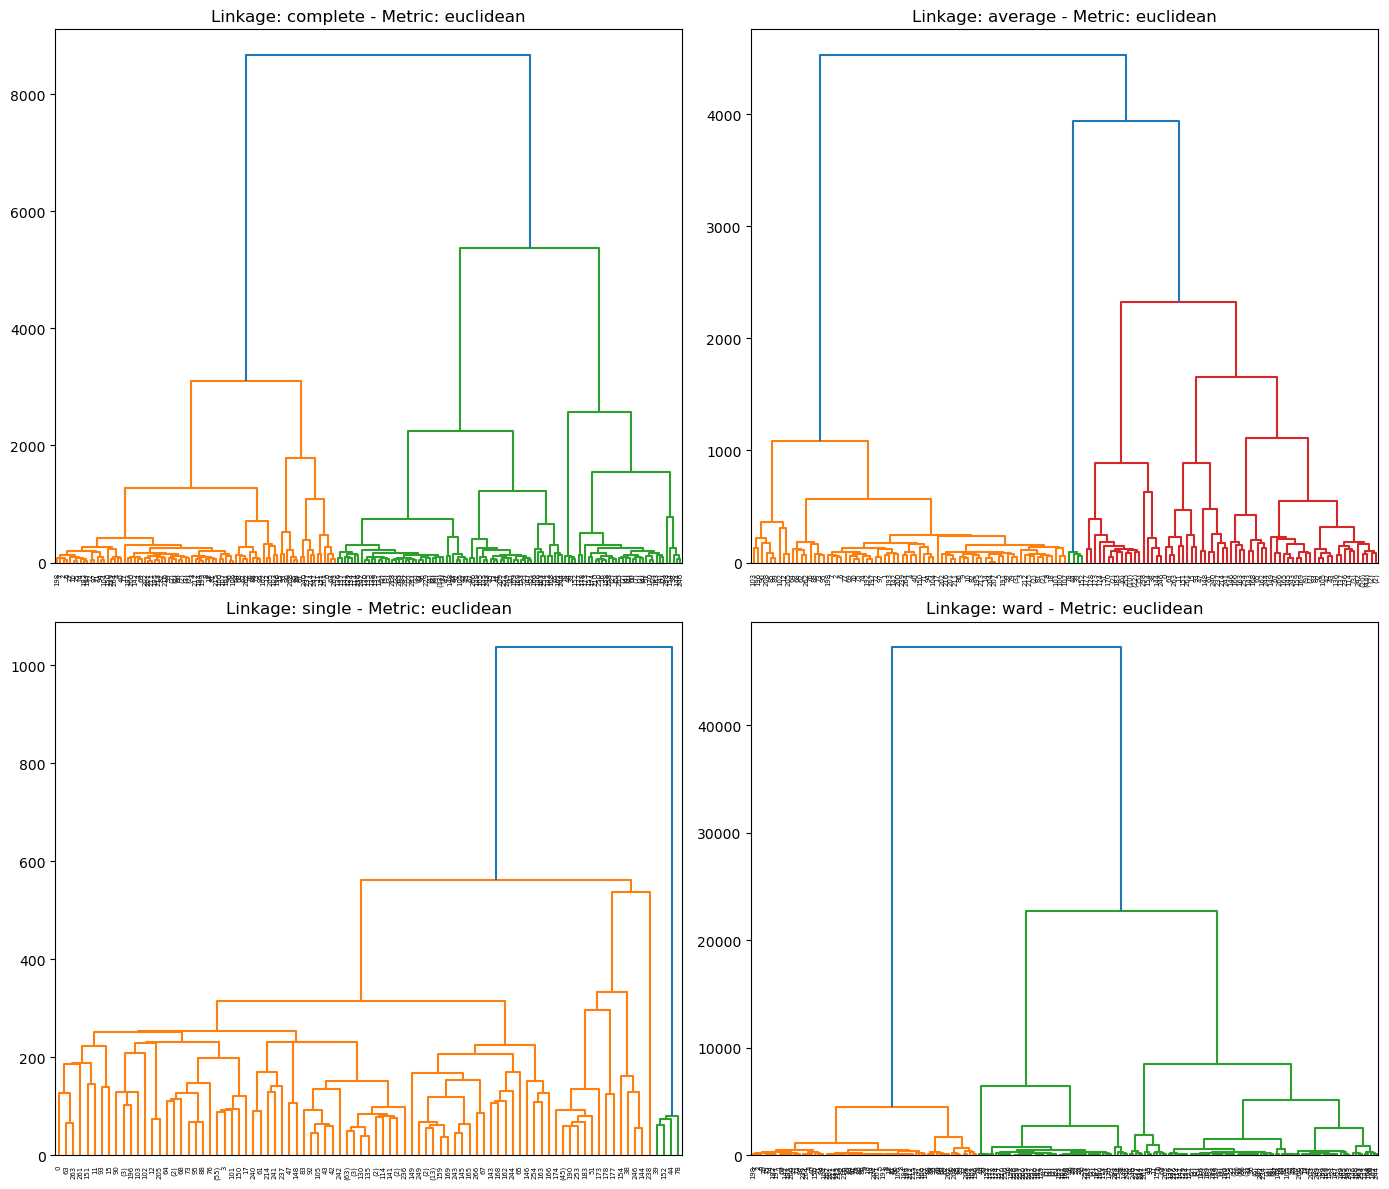

In [17]:
f.plot_hierarchical_dendrograms(data_centroids, 
                                path=None, 
                                linkages=linkages, 
                                metrics=['euclidean'])

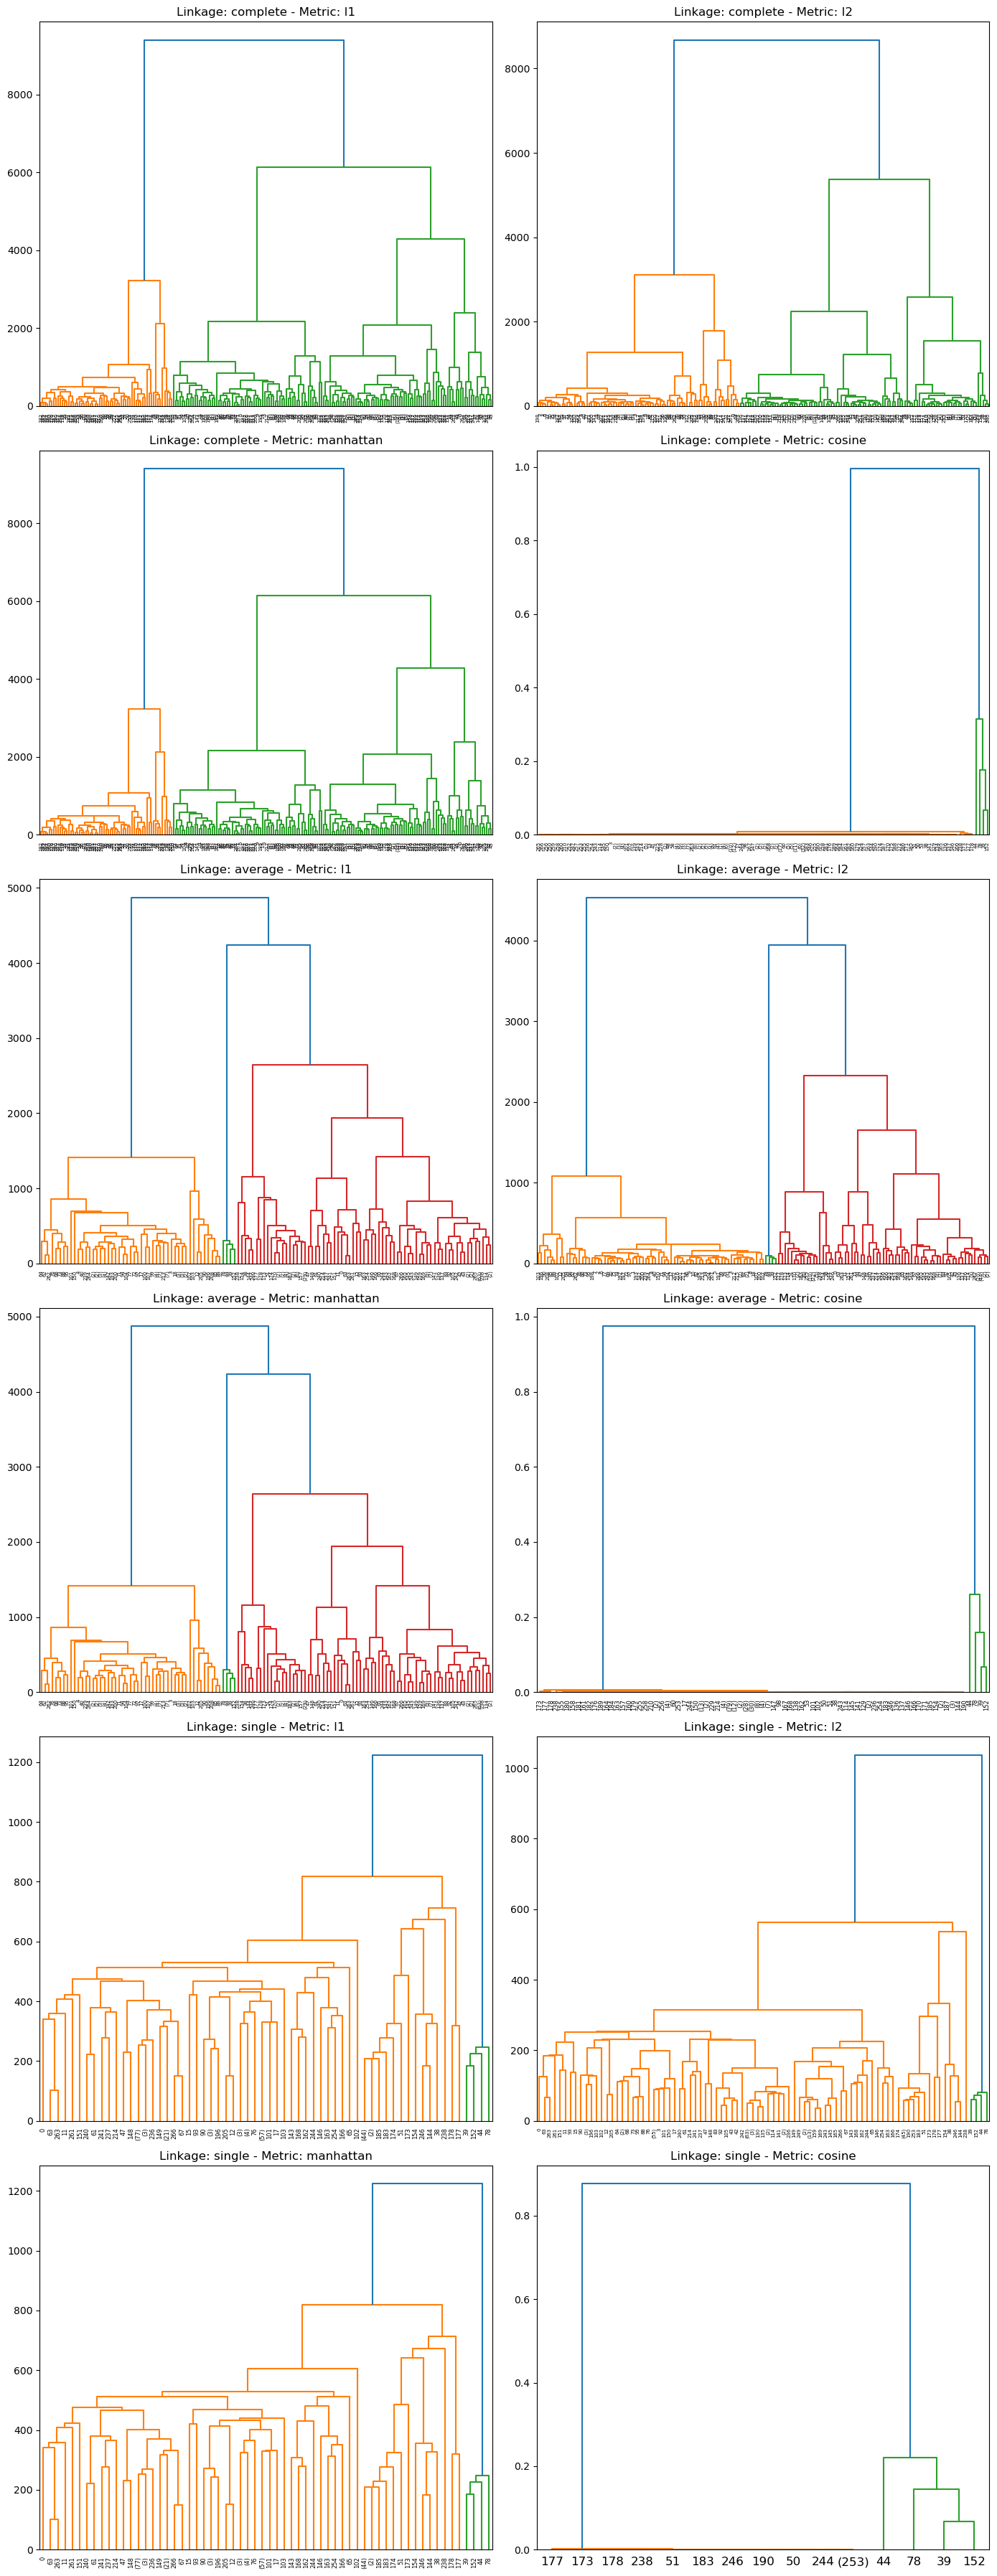

In [18]:
f.plot_hierarchical_dendrograms(data_centroids, 
                                path=None, 
                                linkages=linkages[:3], 
                                metrics=['l1', 'l2', 'manhattan',
                                         'cosine'])

In [57]:
results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'euclidean'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'euclidean'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'ward', "metric": 'euclidean'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l1'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l2'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'manhattan'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l1'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'l1'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'l2'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'manhattan'}
    for k in range(2, 11)
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=data_centroids, feats=data_centroids.columns.tolist(), **settings)
    results.append(result)

# Convert results to DataFrame
final_results_df = pd.DataFrame(results)
final_results_df

Model  n_clusters  linkage     metric        R2  Silhouette  \
0   hierarchical           2  average  euclidean  0.760251    0.723405   
1   hierarchical           3  average  euclidean  0.801695    0.636522   
2   hierarchical           4  average  euclidean  0.949274    0.768291   
3   hierarchical           5  average  euclidean  0.973810    0.757336   
4   hierarchical           6  average  euclidean  0.980692    0.730718   
..           ...         ...      ...        ...       ...         ...   
85  hierarchical           6  average  manhattan  0.980692    0.730718   
86  hierarchical           7  average  manhattan  0.986911    0.703787   
87  hierarchical           8  average  manhattan  0.989317    0.712590   
88  hierarchical           9  average  manhattan  0.991287    0.706301   
89  hierarchical          10  average  manhattan  0.991346    0.681437   

    Calinski-Harabasz  
0          840.322289  
1          533.641619  
2         1640.585868  
3         2435.438617  
4         2651.299017  
..                ...  
85        2651.299017  
86        3267.251844  
87        3426.596969  
88        3668.923252  
89        3271.010512  

[90 rows x 7 columns]

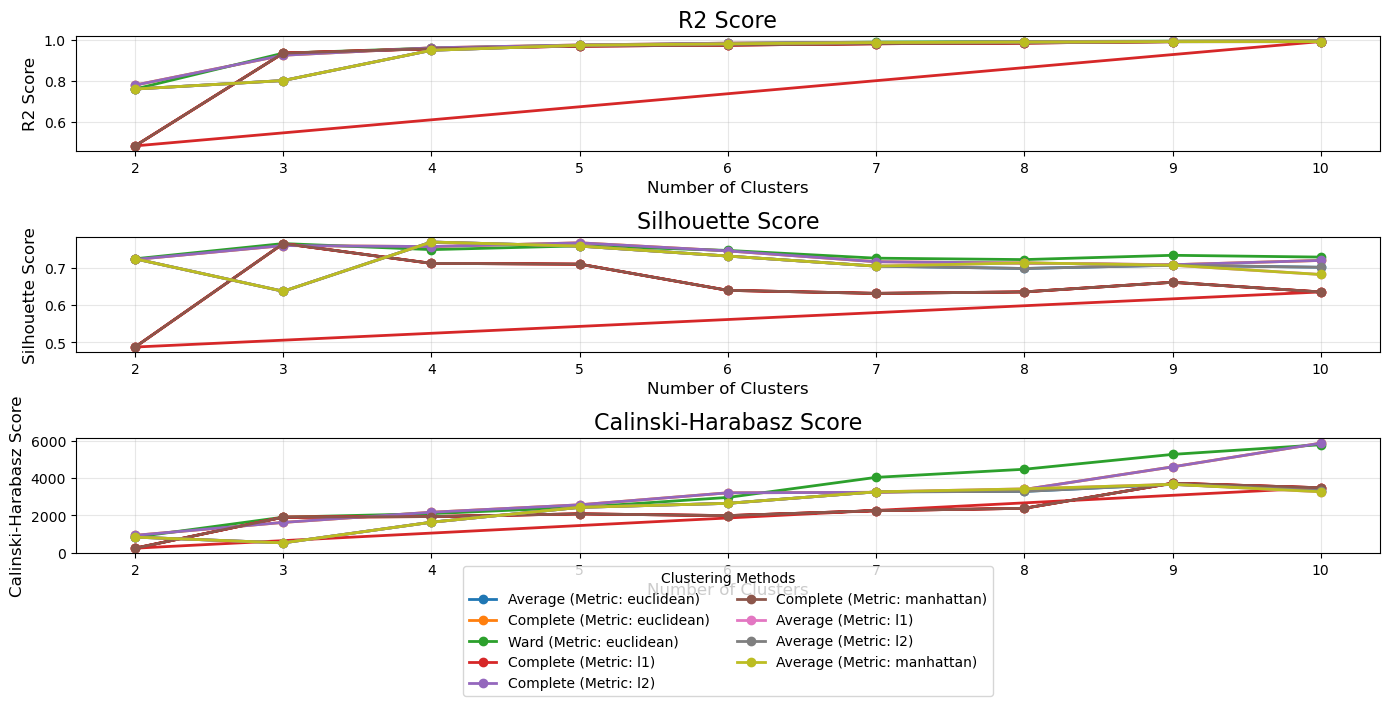

In [58]:
f.plot_evaluation_scores(final_results_df)

**Final Merging Decision**

In [26]:
linkage = 'complete'

hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='l2',
    n_clusters= 4
)

hclust_labels = hclust.fit_predict(data_centroids)
data_centroids['hclust_labels'] = hclust_labels

In [27]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = data_centroids['hclust_labels'].to_dict()
cluster_mapper

{(0, 0, 0, 0, 0): 1,
 (0, 0, 0, 0, 1): 3,
 (0, 0, 0, 0, 2): 3,
 (0, 0, 0, 0, 3): 3,
 (0, 0, 0, 0, 4): 3,
 (0, 0, 0, 1, 0): 3,
 (0, 0, 0, 1, 1): 3,
 (0, 0, 0, 1, 2): 3,
 (0, 0, 0, 1, 3): 3,
 (0, 0, 0, 1, 4): 3,
 (0, 0, 0, 3, 4): 3,
 (0, 0, 1, 0, 1): 1,
 (0, 0, 1, 0, 2): 3,
 (0, 0, 1, 1, 0): 2,
 (0, 0, 1, 1, 1): 3,
 (0, 0, 1, 1, 2): 1,
 (0, 0, 1, 3, 2): 0,
 (0, 0, 2, 0, 4): 3,
 (0, 0, 2, 3, 3): 3,
 (0, 1, 0, 0, 0): 2,
 (0, 1, 0, 0, 1): 2,
 (0, 1, 0, 0, 2): 2,
 (0, 1, 0, 1, 0): 2,
 (0, 1, 0, 1, 1): 2,
 (0, 1, 0, 1, 2): 2,
 (0, 1, 0, 1, 4): 2,
 (0, 1, 1, 0, 0): 2,
 (0, 1, 1, 0, 1): 2,
 (0, 1, 1, 0, 2): 2,
 (0, 1, 1, 1, 0): 2,
 (0, 1, 1, 1, 1): 2,
 (0, 1, 1, 1, 2): 2,
 (0, 1, 2, 0, 0): 2,
 (0, 1, 2, 0, 1): 2,
 (0, 1, 2, 0, 2): 2,
 (0, 1, 2, 3, 0): 2,
 (0, 1, 2, 3, 1): 2,
 (0, 1, 2, 3, 2): 2,
 (0, 2, 0, 0, 1): 0,
 (0, 2, 0, 0, 2): 0,
 (0, 2, 0, 0, 4): 3,
 (0, 2, 0, 1, 0): 2,
 (0, 2, 0, 1, 1): 2,
 (0, 2, 0, 1, 2): 2,
 (0, 2, 0, 1, 4): 0,
 (0, 2, 1, 0, 0): 2,
 (0, 2, 1, 0, 2): 0,
 (0, 2, 1, 1,

In [35]:
df = data.copy()

df['merged_labels'] = df.apply(
    lambda row: cluster_mapper[
        (
            row['temp_data_labels'], 
            row['customer_data_labels'], 
            row['spending_data_labels'], 
            row['product_data_labels'], 
            row['cuisine_data_labels']
        )
    ], axis=1
)

df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                               
1b8f824d5e              2360            18             2              5   
5d272b9dcb              8670            17             2              2   
f6d1b2ba63              4660            38             1              2   
180c632ed8              4660            27             2              3   
4eb37a6705              4660            20             2              5   
...                      ...           ...           ...            ...   
f4e366c281              8670            30             1              1   
f6b6709018              8670            26             1              1   
f74ad8ce3f              8670            24             1              1   
f7b19c0241              8670            34             1              1   
fd40d3b0e0              4660            30             1              1   

             is_chain  first_order  last_order   last_promo payment_method  \
customer_id                                                                  
1b8f824d5e          1            0           1     DELIVERY           DIGI   
5d272b9dcb          2            0           1     DISCOUNT           DIGI   
f6d1b2ba63          2            0           1     DISCOUNT           CASH   
180c632ed8          1            0           2     DELIVERY           DIGI   
4eb37a6705          0            0           2  NO DISCOUNT           DIGI   
...               ...          ...         ...          ...            ...   
f4e366c281          1            0           0      FREEBIE           DIGI   
f6b6709018          0            0           0     DELIVERY           DIGI   
f74ad8ce3f          1            0           0  NO DISCOUNT           DIGI   
f7b19c0241          0            0           0     DISCOUNT           DIGI   
fd40d3b0e0          0            0           0  NO DISCOUNT           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00           0.00       0.0   
5d272b9dcb          12.82       6.39           0.00       0.0   
f6d1b2ba63           9.20       0.00           0.00       0.0   
180c632ed8           0.00      13.70           0.00       0.0   
4eb37a6705          14.57      40.87           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0          0.00          0.0   
5d272b9dcb                  0.0          0.0          0.00          0.0   
f6d1b2ba63                  0.0          0.0          0.00          0.0   
180c632ed8                  0.0          0.0          0.00          0.0   
4eb37a6705                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88         0.00           0.0    

In [60]:
df.groupby('merged_labels').mean(numeric_only=True).T

merged_labels                   0            1            2            3
customer_region       2421.515832  6593.449951  4450.286573  8442.385525
customer_age            27.232315    27.759718    27.436625    27.841614
vendor_count             4.071413     1.436832     2.600583     3.318024
product_count            6.922636     1.967444     4.784835     5.571190
is_chain                 4.644734     0.867347     2.065865     2.031315
...                           ...          ...          ...          ...
temp_data_labels         0.956658     1.080661     1.046134     1.065553
customer_data_labels     2.163148     3.022838     1.909706     0.306750
spending_data_labels     1.144509     0.241497     0.938551     0.204593
product_data_labels      0.915899     0.941691     0.883022     0.802784
cuisine_data_labels      1.974624     1.976919     1.744903     1.813918

[129 rows x 4 columns]

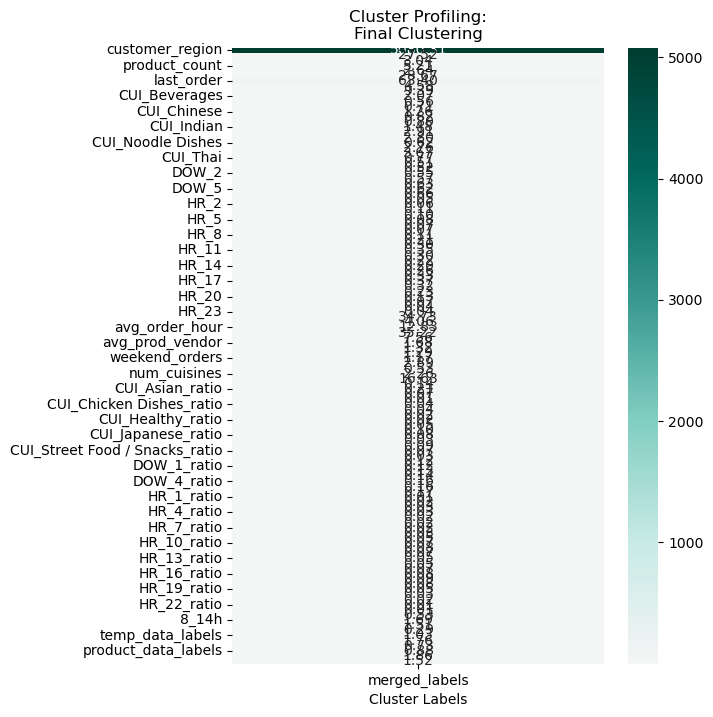

In [41]:
f.plot_cluster_profiling(df.drop(all_categ, axis = 1), 
                         'merged_labels', 
                         "Final")

In [42]:
# cluster size
df_counts = df.groupby('merged_labels')\
    .size()\
    .to_frame()

df_counts

0
merged_labels       
0               8906
1               4116
2              10643
3               7185

In [43]:
# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts


merged_labels      0
0  (2, 3, 2, 3, 2)   8906
1  (2, 4, 0, 1, 2)   4116
2  (2, 4, 1, 1, 2)  10643
3  (2, 4, 0, 1, 4)   7185

# 3. Cluster Analysis

<a href="#top">Top &#129033;</a>

In [44]:
data = df.copy()

In [45]:
v.plot_grouped_bar_chart(data, 'product_count',
                         'last_promo', 
                         data['merged_labels'])

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [49]:
import seaborn as sns

def cluster_profiles(df, label_columns, figsize, 
                     cmap="tab10",
                     compare_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify these label columns to perform the cluster profile according to them.
    """
    
    if compare_titles is None:
        compare_titles = [""] * len(label_columns)
        
    fig, axes = plt.subplots(nrows=len(label_columns), 
                             ncols=2, 
                             figsize=figsize, 
                             constrained_layout=True,
                             squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compare_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i != label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:, [0, 1]]
        counts.columns = [label, "counts"]
        
        # Convert label column to string for plotting
        centroids[label] = centroids[label].astype(str)
        counts[label] = counts[label].astype(str)
        
        # Setting Data
        pd.plotting.parallel_coordinates(
            centroids, 
            label, 
            color=sns.color_palette(cmap),
            ax=ax[0]
        )

        sns.barplot(
            x=label, 
            hue=label,
            y="counts", 
            data=counts, 
            ax=ax[1], 
            palette=sns.color_palette(cmap)
        )

        # Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95, 1.1), xycoords='axes fraction', fontsize=13, fontweight='heavy') 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                              rotation=40,
                              ha='right')
        
        ax[0].legend(handles, cluster_labels,
                     loc='center left', bbox_to_anchor=(1, 0.5), title=label)  # Adaptable to number of clusters
        
        ax[1].set_xticks([i for i in range(len(handles))])
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
        
    plt.suptitle("Cluster Simple Profiling", fontsize=23)
    plt.show()


In [50]:
label_cols = ['temp_data_labels', 'customer_data_labels', 'merged_labels']

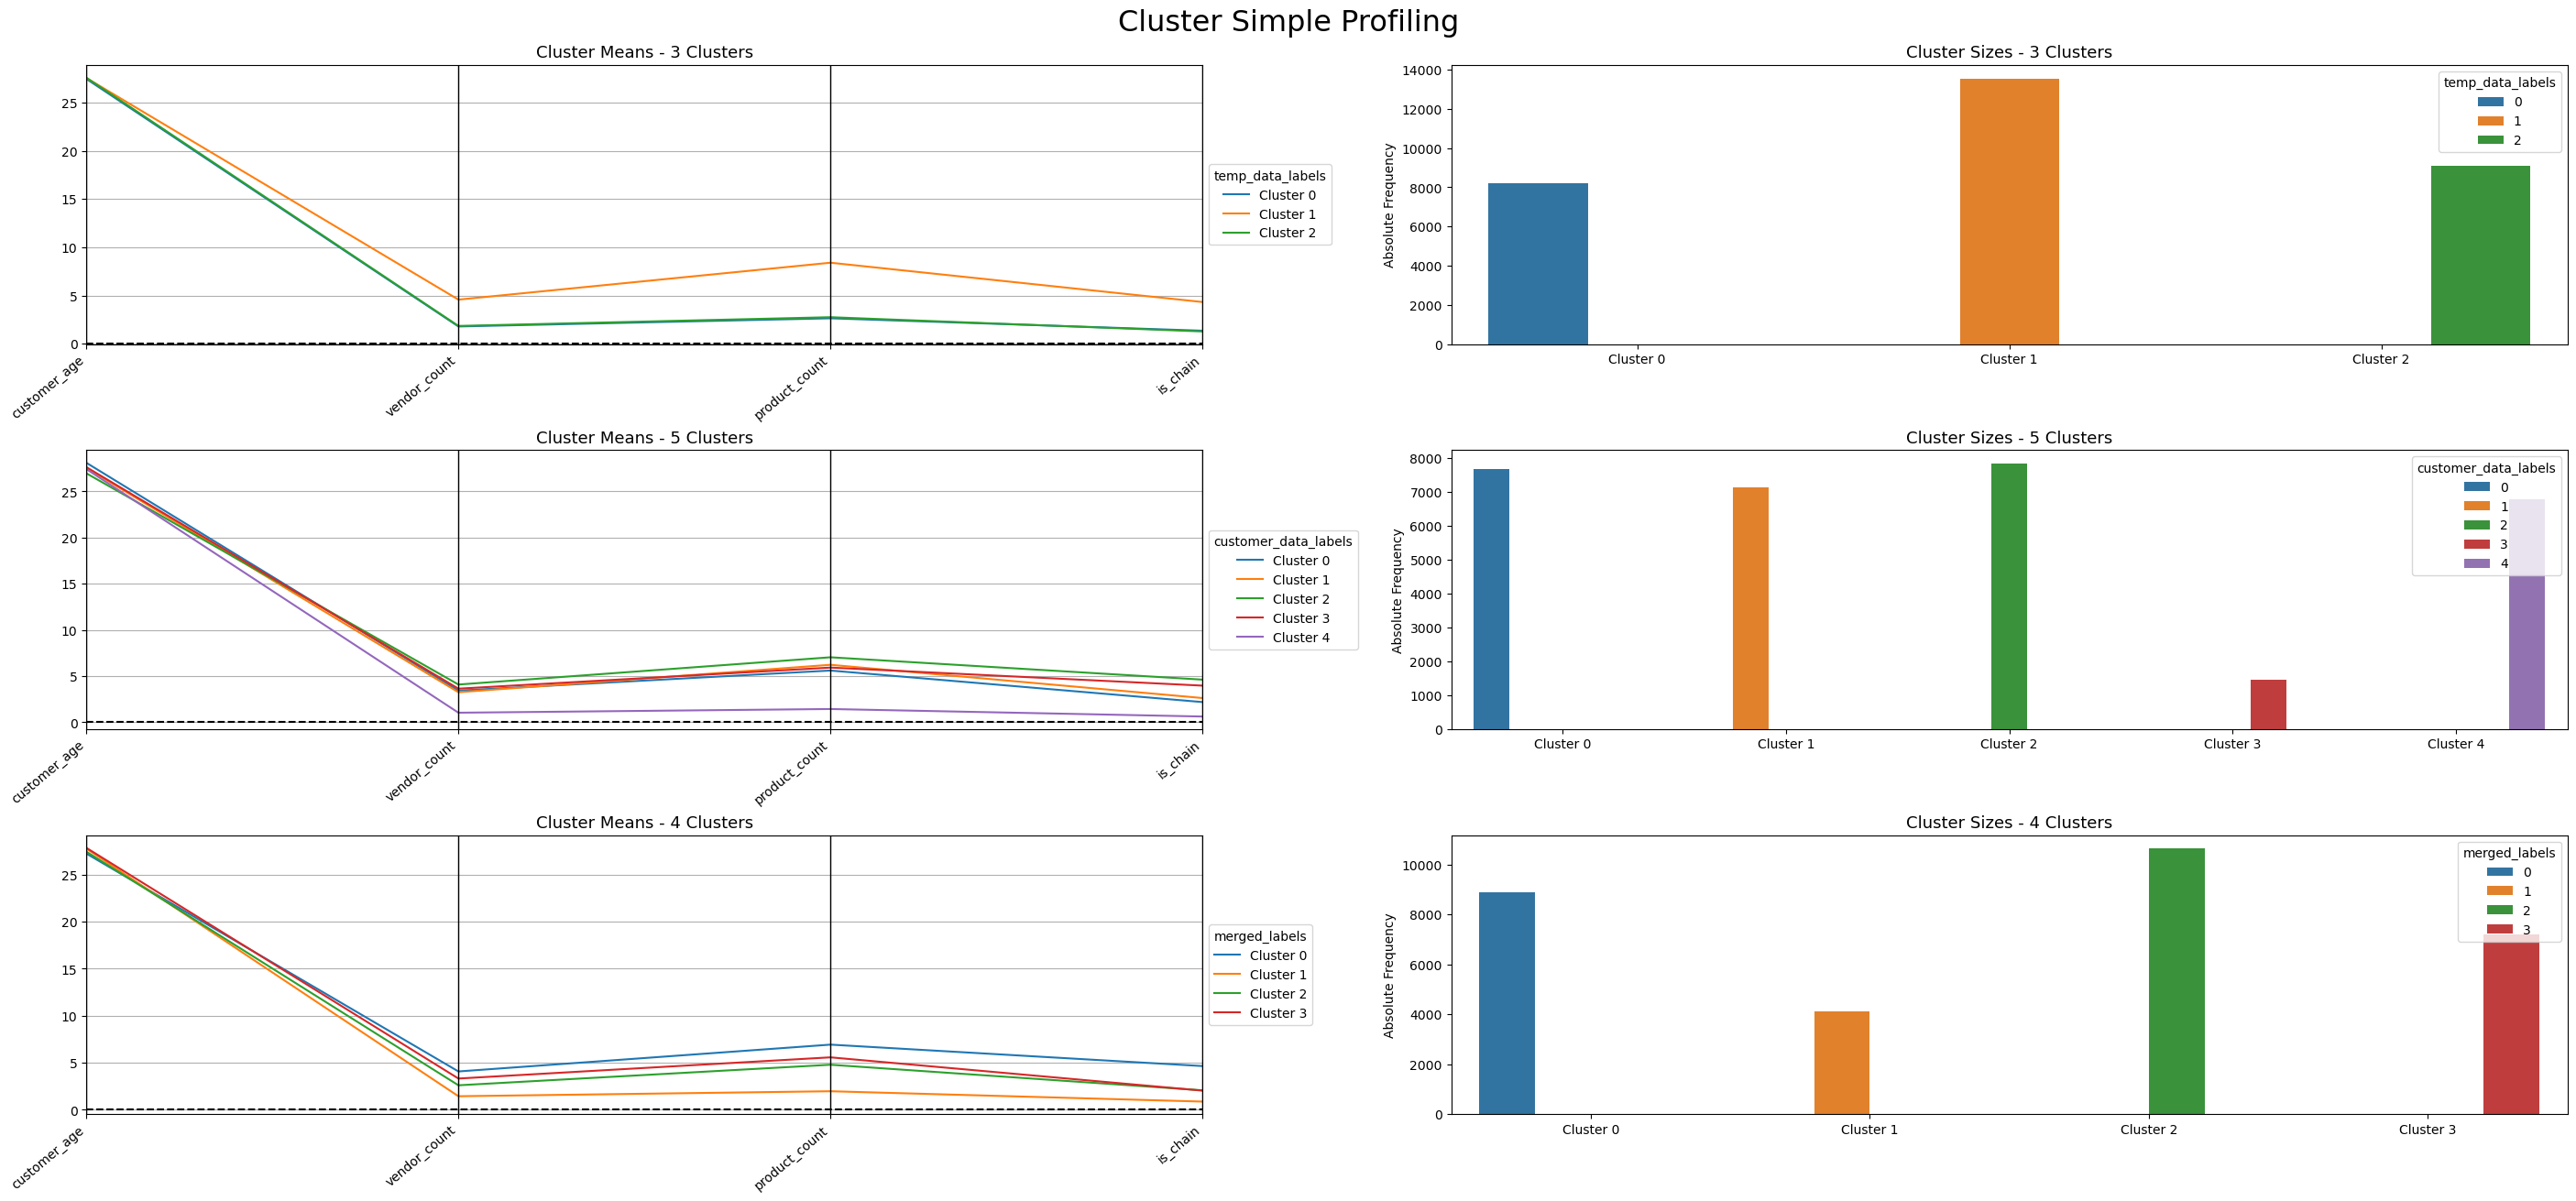

In [51]:
cluster_profiles(
    df=data[['customer_age', 'vendor_count', 'product_count', 'is_chain'] + label_cols], 
    label_columns = label_cols,
    figsize=(28, 13), 
    cmap="tab10",
    compare_titles=None
)
